# Comprehensive Data Visualization with Matplotlib
## Deep Diving into The Movie Lens Dataset

Data Visualization is one of the fundamental skills in the Data Scientist toolkit. Possessing the ability to tell compelling stories of data, given the right data, can unlock a goldmind of opportunities for any organisation. 

In the past, I've written about ways to do [effective data visualziation](https://towardsdatascience.com/effective-data-visualization-ef30ae560961), but in this post we are going to get our hands dirty and do some visualizations using those tips and our curious mind.

https://towardsdatascience.com/effective-data-visualization-ef30ae560961

In [5]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 

from datetime import datetime
from IPython.display import IFrame

import warnings 
warnings.filterwarnings("ignore")

In [6]:
np.__version__, pd.__version__, matplotlib.__version__

('1.19.1', '1.0.5', '3.2.2')

In [2]:
# read data
rating_df= pd.read_csv("../data/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

item_df = pd.read_csv("../data/u.item", sep="|",encoding="latin-1", 
                      names=["movie_id", "movie_title", "release_date", "video_release_date",
                             "imbd_url", "unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
                             "film_noir", "horror", "musical", "mystery", "romance", 
                             "sci-fi", "thriller", "war", "western"])

user_df = pd.read_csv("../data/u.user", sep="|", encoding="latin-1", names=["user_id", "age", "gender",
                                                                            "occupation", "zip_code"])


We have 3 key DataFrames: 

* rating_df - The full u data set holding all the ratings given by users
* item_df - Information about the items (movies)
* user_df - Demographic information about the users

We will begin by taking a further peak at these DataFrames.

In [3]:
# peak at ratings_df
print(rating_df.info())
rating_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


We have 100k ratings and 4 columns in the ratings dataframe, however the timestamp column is a int64. From the README we identify that the timestamp column are unix seconds since 1/1/1970 UTC, hence we use `Datetime` (a Python Built-in) to convert the Dtype of the `timestamp` column to a datetime64. 

In [4]:
# convert timestamp column to time stamp 
rating_df["timestamp"] = rating_df.timestamp.apply(lambda x: datetime.fromtimestamp(x / 1e3))

# check if change has been applied 
print(rating_df.info())
rating_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   item_id    100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB
None


,user_id,item_id,rating,timestamp
0,196,242,3,1970-01-11 04:47:30.949
1,186,302,3,1970-01-11 07:41:57.742
2,22,377,1,1970-01-11 04:08:07.116
3,244,51,2,1970-01-11 04:36:46.923
4,166,346,1,1970-01-11 06:13:17.596


Excellent, this worked as planned. We can now move on to the item data

In [5]:
# peak at items_df 
print(item_df.info())
item_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imbd_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   action              1682 non-null   int64  
 7   adventure           1682 non-null   int64  
 8   animation           1682 non-null   int64  
 9   childrens           1682 non-null   int64  
 10  comedy              1682 non-null   int64  
 11  crime               1682 non-null   int64  
 12  documentary         1682 non-null   int64  
 13  drama               1682 non-null   int64  
 14  fantasy             1682 non-null   int64  
 15  film_noir           1682 non-null   int64  
 16  horror

,movie_id,movie_title,release_date,video_release_date,imbd_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We have 1682 unique items that our users have provided ratings to. Additionally, the `video_release_date` column has no entries hence it's not something of value to us and we can remove the entire column - `release_date` and `imbd_url` are also missing some values, but not enough that we need to delete the column. 

Another thing that I noticed is that `release_date` is type object when it should be a datetime, so we will convert that also.

In [7]:
# drop empty column 
item_df.drop("video_release_date", axis=1, inplace= True)

# convert non-null values to datetime in release_date
item_df["release_date"] = item_df[item_df.release_date.notna()]["release_date"].apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))

# check if change is applied
print(item_df.info(), item_df.shape)
item_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      1682 non-null   int64         
 1   movie_title   1682 non-null   object        
 2   release_date  1681 non-null   datetime64[ns]
 3   imbd_url      1679 non-null   object        
 4   unknown       1682 non-null   int64         
 5   action        1682 non-null   int64         
 6   adventure     1682 non-null   int64         
 7   animation     1682 non-null   int64         
 8   childrens     1682 non-null   int64         
 9   comedy        1682 non-null   int64         
 10  crime         1682 non-null   int64         
 11  documentary   1682 non-null   int64         
 12  drama         1682 non-null   int64         
 13  fantasy       1682 non-null   int64         
 14  film_noir     1682 non-null   int64         
 15  horror        1682 non-null   int64   

,movie_id,movie_title,release_date,imbd_url,unknown,action,adventure,animation,childrens,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We can view some of the urls in `imbd_url` using `IFrame` from the `Ipython` library... 

Note: The urls in the `imbd_url` columns may of removed to a new address permanently or are down. Also, I could not connect to the imbd webpage when I manually entered the url for a movie (i.e. I entered copycat (1995) url in IFrame and it returned that it refused to connect - I have not worked a way around this yet, but will update the notebook once I have. In the meantime, I've simply used the imbd url so you have an idea of how it would work - essentially, we have full access to the webpage from our notebook. 

In [8]:
# viewing random imbd_urls
IFrame("https://www.imdb.com", width=800, height=400)

Now let's look at the user data... 

In [9]:
# peak at user data
print(user_df.info())
user_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


We have 943 users - in summary, we have 100k ratings from 943 users on 1682 movies. To make data visualization simple at various points in the notebook, we will combine the dataframes. 

https://towardsdatascience.com/pandas-combining-data-b190d793b626

In [10]:
# store full dataframe 
full_df = pd.merge(user_df, rating_df, how="left", on="user_id")
full_df = pd.merge(full_df, item_df, how="left", right_on="movie_id", left_on="item_id")
full_df.head()

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,24,M,technician,85711,61,4,1970-01-11 04:02:22.420,61,Three Colors: White (1994),...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,189,3,1970-01-11 06:52:12.928,189,"Grand Day Out, A (1992)",...,0,0,0,0,0,0,0,0,0,0
2,1,24,M,technician,85711,33,4,1970-01-11 04:02:22.699,33,Desperado (1995),...,0,0,0,0,0,1,0,1,0,0
3,1,24,M,technician,85711,160,4,1970-01-11 03:04:32.547,160,Glengarry Glen Ross (1992),...,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,20,4,1970-01-11 06:30:31.883,20,Angels and Insects (1995),...,0,0,0,0,0,1,0,0,0,0


Great! We know in summary the amount of ratings, users, and items (movies) in our dataframe, however if we want to get a better understanding of our data we ought to ask some questions of our data that give us informative information. 

## What are the top 10 most rated movies? 

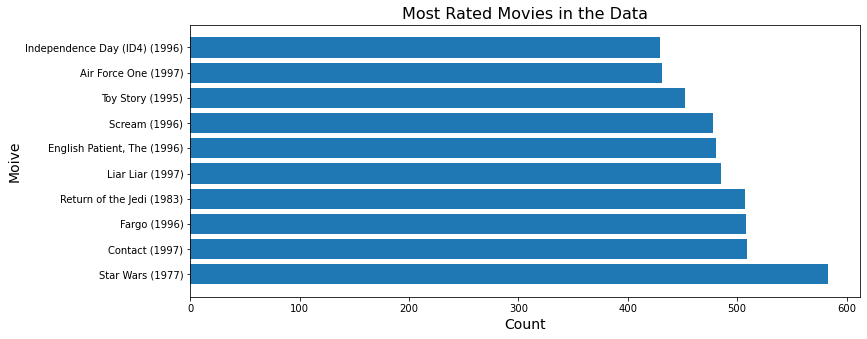

In [11]:
# return number of rows associated to each title
top_ten_movies = full_df.groupby("movie_title").size().sort_values(ascending=False)[:10]

# plot the counts
plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("Most Rated Movies in the Data", fontsize=16)
plt.ylabel("Moive", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

Star Wars is the cleary the most rated film in our dataset. We can go further into this a begin to think of what sort of genres are associated with Star wars... 

In [12]:
genres= ["unknown", "action", "adventure", "animation", "childrens", "comedy", "crime",
         "documentary", "drama", "fantasy", "film_noir", "horror", "musical",
         "mystery", "romance", "sci-fi", "thriller", "war", "western"]

full_df[full_df.movie_title == "Star Wars (1977)"][genres].iloc[0].sort_values(ascending=False)

action         1
sci-fi         1
romance        1
adventure      1
war            1
western        0
documentary    0
animation      0
childrens      0
comedy         0
crime          0
fantasy        0
drama          0
film_noir      0
horror         0
musical        0
mystery        0
thriller       0
unknown        0
Name: 204, dtype: int64

Action, Sci-fi, Romance, Adventure and War - Sounds about right for a Star Wars film. Just out of curisity I am going to look at the 10 least rated movies. 

In [13]:
# the least rated movies 
least_10_movies = full_df.groupby("movie_title").size().sort_values(ascending=False)[-10:]
least_10_movies

movie_title
Coldblooded (1995)                            1
MURDER and murder (1996)                      1
Big Bang Theory, The (1994)                   1
Mad Dog Time (1996)                           1
Mamma Roma (1962)                             1
Man from Down Under, The (1943)               1
Marlene Dietrich: Shadow and Light (1996)     1
Mat' i syn (1997)                             1
Mille bolle blu (1993)                        1
Á köldum klaka (Cold Fever) (1994)            1
dtype: int64

It's important to know about this because this will affect how we decide to recommend movies in a later post. Nonetheless, let's continue our Visualizations. 

## What are the Max/Min number of Movies rated by One user? 

In [39]:
movies_rated = rating_df.groupby("user_id").size().sort_values(ascending=False)
print(f"Max movies rated by one user: {max(movies_rated)}\nMin movies rated by one user: {min(movies_rated)}")

Max movies rated by one user: 737
Min movies rated by one user: 20


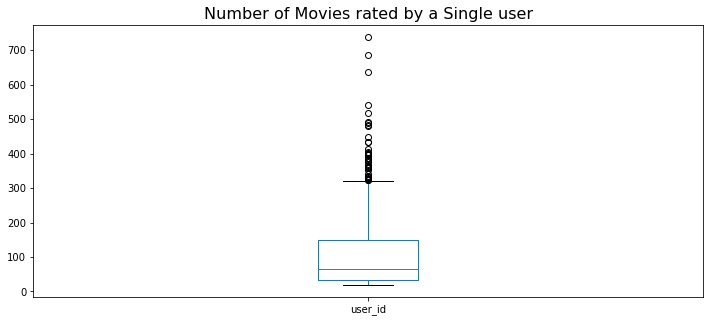

In [40]:
rating_df.user_id.value_counts().plot.box(figsize=(12, 5))
plt.title("Number of Movies rated by a Single user", fontsize=16)
plt.show()

The median is around 70 and there are plenty of outliers that have rated more than the extreme value of approx 320. 

## How many Movies were released per year? 

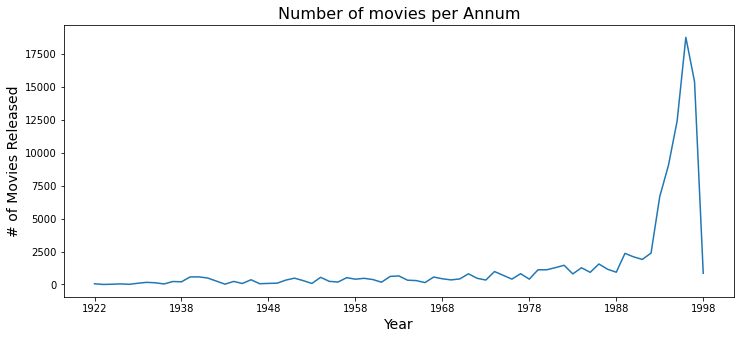

In [15]:
# create the year column from Movie title 
full_df["year"] = full_df["movie_title"].str.extract("\((\d{4})\)", expand=True)

# return number of rows by the year 
year_counts = full_df[["movie_title", "year"]].groupby("year").size()

fig, ax = plt.subplots(figsize=(12, 5)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(9)) # changes the number of xticks we see00
plt.title("Number of movies per Annum", fontsize=16)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("# of Movies Released", fontsize=14)
plt.show()

It's pretty hard to miss the massive spike and dip between 1988 - 1998. It's worth doing some investigating as to what could of happened during this period as to why there is such a massive spike. 

## How many Men/Women rated movies? 

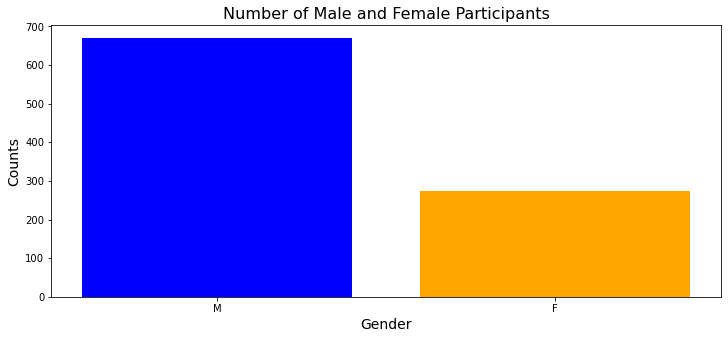

In [52]:
# count the number of male and female raters
gender_counts = user_df.gender.value_counts()

# plot the counts 
plt.figure(figsize=(12, 5))
plt.bar(x= gender_counts.index[0], height=gender_counts.values[0], color="blue")
plt.bar(x= gender_counts.index[1], height=gender_counts.values[1], color="orange")
plt.title("Number of Male and Female Participants", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show() 

There are clearly a lot more males that in this sample than females. 

## What's the Age Distribution by Gender? 

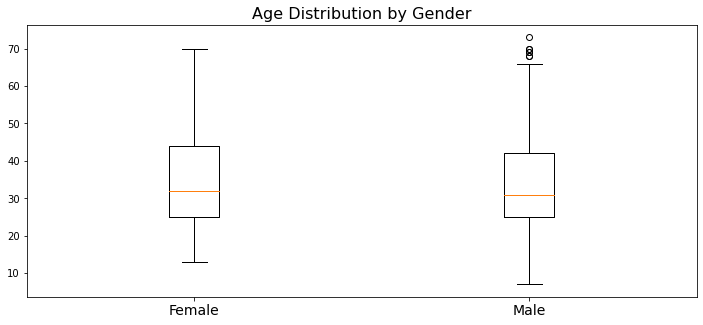

In [37]:
# creating new variable for ages of all males and females
female_age_dist = user_df[user_df["gender"] == "F"]["age"]
male_age_dist = user_df[user_df["gender"] == "M"]["age"]

# plotting boxplots 
plt.figure(figsize=(12,5))
plt.boxplot([female_age_dist, male_age_dist])
plt.xticks([1, 2], ["Female", "Male"], fontsize=14)
plt.title("Age Distribution by Gender", fontsize=16)

plt.show()

The male age distribution has some outliers, however the female median age is slightly higher than males. Additionally, the female age distribution box is longer than the male box meaning it's more dispearsed than the male ages.

Let's look more into the type of movies that males and females preferred... 

## What are the most popular Movie Genres among Males and Females?

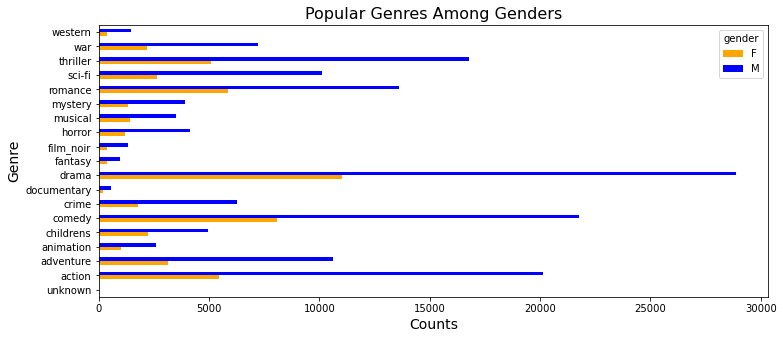

In [60]:
full_df[genres+["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12,5), color=["orange", "blue"])
plt.xlabel("Counts",fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Popular Genres Among Genders", fontsize=16)
plt.show()

It's no surprise that Drama tops the charts for both genders - I guess we all want to know about some spilt tea. Comedy follows up next for both genders but it is hard to ignore the difference between the amount of males that watched a specific genre compared to female. Of-course, we take into consideration there are more males in this dataaset than females but we must consider this when we think of building our recommendation system. 

What will be interesting is to see how genre preferences changes if we put an age constraint...

## What are the most popular Movie Genres among Children by gender? 
Using UK standards, an adult can be defined as someone that is >= 18 years old, hence a Child would be < 18. 

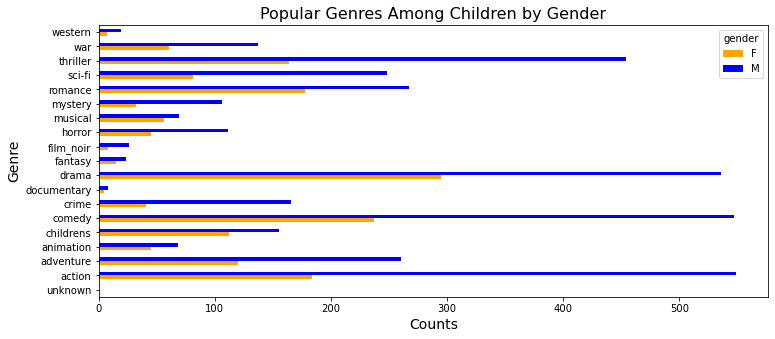

In [62]:
full_df[full_df["age"] < 18][genres + ["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12, 5), color=["orange", "blue"])
plt.xlabel("Counts",fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Popular Genres Among Children by Gender", fontsize=16)
plt.show()

Drama is still quite popular for under 18 males, but more males under 18 preferred comedy and action films. On the other hand, females under 18 pretty much didn't change, it's still drama and comedy - they do say women mature before men to be fair.

These figures were interesting, but I was wondering whether the likes of drama and comedy were highly preferred amongst genders because those are actually the best movies or whether it is because those tags are associated with the most movies.

## What Genre is associated to the most Movies? 
Note: Multiple genres can be assocaited to a movie (i.e. A movie can be animation, childerns and comedy) 

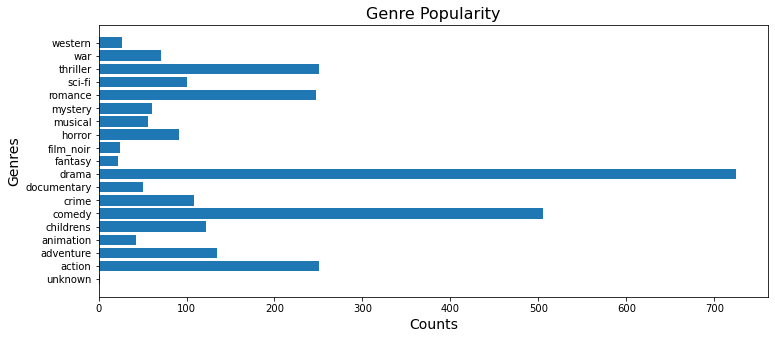

In [63]:
# get the genre names in the dataframe and their counts
label= item_df.loc[:, "unknown":].sum().index
label_counts= item_df.loc[:, "unknown":].sum().values

# plot a bar chart
plt.figure(figsize=(12, 5))
plt.barh(y= label, width= label_counts)
plt.title("Genre Popularity", fontsize=16)
plt.ylabel("Genres", fontsize=14)
plt.xlabel("Counts", fontsize=14)

plt.show()

Just as I thought, drama and comedy tags are associated to the most films in the sample. Maybe filmmakers are aware of our need for a laugh and some drama hence they play on it.

Next we observe the average ratings per genre... 

## Kernel Density Plot To Observe the Distribution of Ratings per Genre
- Density plots are used to observe the distribution of a variable in a dataset.

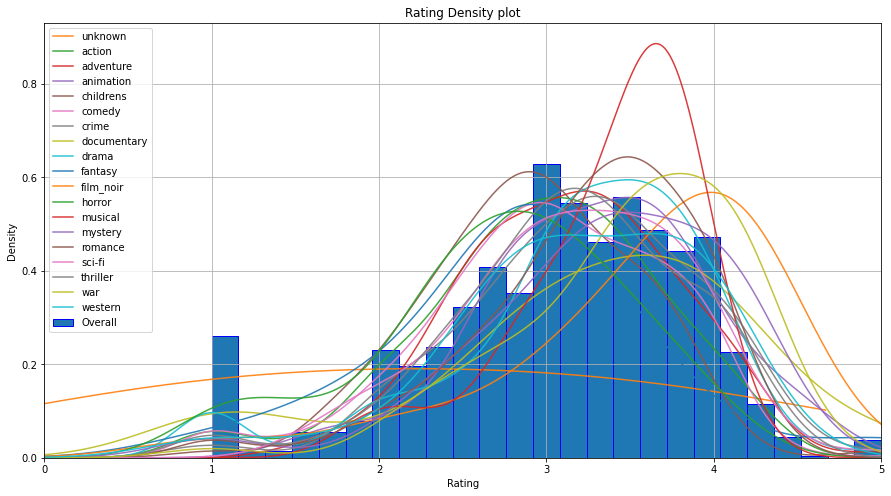

In [61]:
# https://github.com/HarilalOP/movielens-data-exploration/blob/master/src/main/code/exploratory_analysis.ipynb
df_temp = full_df[['movie_id','rating']].groupby('movie_id').mean()

# Histogram of all ratings
df_temp.hist(bins=25, grid=False, edgecolor='b', density=True, label ='Overall', figsize=(15,8))

# KDE plot per genre
for genre in genres:
    df_temp = full_df[full_df[genre]==True][['movie_id','rating']].groupby('movie_id').mean()
    df_temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)
plt.legend()
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()

The plot is predominately left-skewed for most genres.

Ok, the last plot was abit more complicated. We can simplify things again by looking at the occupation of users.

## What's the most common occupation amongst the users? 

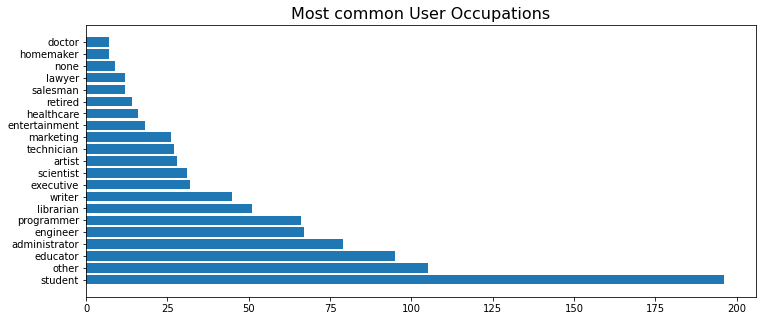

In [63]:
# creating the index and values variables for occupation
occ_label= user_df.occupation.value_counts().index
occ_label_counts = user_df.occupation.value_counts().values

# plot horizontal bar chart
plt.figure(figsize=(12,5))
plt.barh(y=occ_label, width=occ_label_counts)
plt.title("Most common User Occupations", fontsize=16)
plt.show()

To nobodies suprise, the majority of people in the dataset are students. Let's see the average ratings given by each occupation. 

## What is the average rating of a given occupation? 

In [73]:
# creating a empty df to store data
df_temp = pd.DataFrame(columns=["occupation", "avg_rating"])

# loop through all the occupations 
for idx, occ in enumerate(occ_label):
    df_temp.loc[idx, "occupation"] = occ 
    df_temp.loc[idx, "avg_rating"] = round(full_df[full_df["occupation"] == occ]["rating"].mean(), 2)

# sort from highest to lowest
df_temp = df_temp.sort_values("avg_rating", ascending=False).reset_index(drop=True)
df_temp 

,occupation,avg_rating
0,none,3.78
1,lawyer,3.74
2,doctor,3.69
3,educator,3.67
4,artist,3.65
5,administrator,3.64
6,scientist,3.61
7,salesman,3.58
8,programmer,3.57
9,librarian,3.56


## Wrap Up
Stopping at this point was difficult because I personally believe that Data Visualization does not really have an end, so it is down to the person doing the visualizations to decide when to stop. A good point for me is when I feel I have a good understanding of the data and I will build a model and interpret the results and do more visualizations to take me further into the data. 